# STC Jawwy

In [ ]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [21]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
#import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of details about each customer and the movies and/or tv shows watched in addition to the genre.

You are required to work on task three to build a recommendation engine for our platform to Recommend movies to usesrs that they might be interested in¶


In [24]:
dataframe = pd.read_excel("/content/sample_data/stc TV Data Set_T33.xlsx",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [25]:
# check the data shape
dataframe.shape

(1048575, 5)

In [26]:
# display the first 5 rows
dataframe.head()

,user_id_maped,program_name,rating,date_,program_genre
0,26138,100 treets,1,2017-05-27,Drama
1,7946,Moana,1,2017-05-21,Animation
2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,15860,Churchill,2,2017-07-07,Biography


In [27]:
# describe the numeric values in the dataset
dataframe.describe()

,user_id_maped,rating,date_
count,1.048575e+06,1.048575e+06,1048575
mean,1.709266e+04,2.497283e+00,2017-10-04 00:23:20.346183936
min,1.000000e+00,1.000000e+00,2017-03-14 00:00:00
25%,8.253000e+03,1.000000e+00,2017-06-10 00:00:00
50%,1.714900e+04,2.000000e+00,2017-10-14 00:00:00
75%,2.566500e+04,3.000000e+00,2018-01-21 00:00:00
max,3.428000e+04,4.000000e+00,2018-04-30 00:00:00
std,1.003513e+04,1.119837e+00,NaN


In [28]:
# check if any column has null value in the dataset
dataframe.isnull().any()

user_id_maped    False
program_name     False
rating           False
date_            False
program_genre    False
dtype: bool

In [29]:
# we import Visualization libraries
# you can ignore and use any other graphing libraries
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [35]:
dataframe[["user_id_maped","program_name","rating"]]

,user_id_maped,program_name,rating
0,26138,100 treets,1
1,7946,Moana,1
2,7418,The Mermaid Princess,1
3,19307,The Mermaid Princess,2
4,15860,Churchill,2
...,...,...,...
1048570,23716,Extraterrestrial,4
1048571,1776,Friends The One With The Holiday Armadillo,3
1048572,1918,Masters of Horror Dreams In The Witch House,1
1048573,25737,Two Lovers and a Bear,2


In [38]:
# Calculate mean rating of all movies
dataframe.groupby('program_name')['rating'].mean().sort_values(ascending=False).head(30)


program_name
World's Best Chefs  Alex Atala                             4.0
Criminal Minds     The Lesson                              4.0
Criminal Minds     Children Of The Dark                    4.0
Scandal     candal     Enemy Of The tate                   4.0
Scandal     candal     Grant: For The People               4.0
Scandal     candal     The Trail                           4.0
Criminal Minds     The Longest Night                       4.0
Scandal  (T)    More Cattle  Less Bull                     4.0
Criminal Minds     The Replicator                          4.0
Scandal  (T)    Ride  ally  Ride                           4.0
Scandal  (T)    The Fluffer                                4.0
Criminal Minds     Bully                                   4.0
Criminal Minds     The Return                              4.0
Criminal Minds     Brothers In Arms                        4.0
Criminal Minds     Breath Play                             4.0
Active hooter: America Under Fire  Oak Cre

In [37]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(dataframe.groupby('program_name')['rating'].mean())

ratings['num of ratings'] = pd.DataFrame(dataframe.groupby('program_name')['rating'].count())

ratings.head()

,rating,num of ratings
program_name,,
#FollowFriday,1.784314,510
10 Days in a Madhouse,1.707052,553
100 treets,1.836305,1851
101 Dalmatians,1.466102,118
102 Dalmatians,1.558140,172


from matplotlib import pyplot as plt
_df_0['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num of ratings'].plot(kind='hist', bins=20, title='num of ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='rating', y='num of ratings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['num of ratings'].plot(kind='line', figsize=(8, 4), title='num of ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

<Axes: >

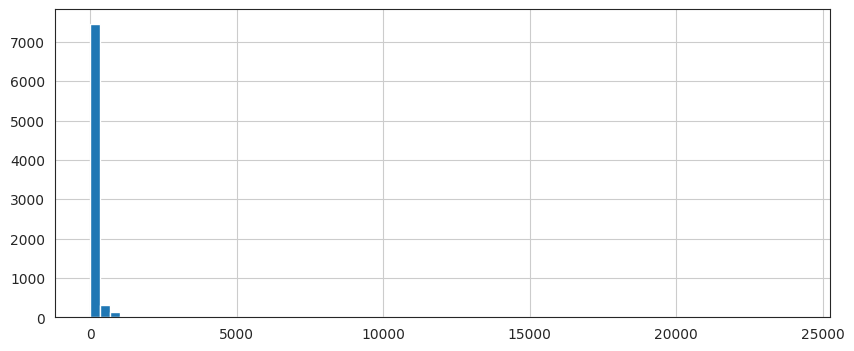

In [40]:
# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))

ratings['num of ratings'].hist(bins = 70)

In [41]:
"""
TODO build your Recommender system to Highlight Programs that usesrs might be interested in
"""
# Sorting values according to
# the 'num of rating column'
moviemat = dataframe.pivot_table(index ='user_id_maped',
              columns ='program_name', values ='rating')

moviemat.head()

ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
program_name,,
The Boss Baby,2.008858,24047
Pingu,2.819903,17063
Trolls,1.996592,13793
The Adventures of Petey and Friends,1.824698,9612
Moana,2.082911,8081
The Mermaid Princess,1.854352,7525
Baywatch,1.817913,7436
Oscar's Oasis,2.857681,7174
Ferdinand,1.941030,6817


In [43]:
"""
TODO show the recommendations (top 5) for the people who watched "Moana" movie
"""
# analysing correlation with similar movies
Moana_user_ratings = moviemat["Moana"]


Moana_user_ratings.head()



user_id_maped
1    NaN
5    NaN
9    NaN
11   NaN
15   NaN
Name: Moana, dtype: float64

In [45]:
# analysing correlation with similar movies
similar_to_Moana = moviemat.corrwith(Moana_user_ratings)


corr_Moana = pd.DataFrame(similar_to_Moana, columns =['Correlation'])
corr_Moana.dropna(inplace = True)

corr_Moana.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
program_name,
#FollowFriday,0.240032
10 Days in a Madhouse,-0.028773
100 treets,0.140751
101 Dalmatians,-0.043753
102 Dalmatians,0.036636
